<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Escuela de Ciencias Físicas y Matemática</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento Jerarquico
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Ariana Cabrera &bull; 11/12/2024
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de agrupamiento jerárquico a un conjunto de datos.

Los paquetes necesarios son:

In [ ]:
# Paquetes necesarios
import pandas as pd # Para manejo de datos
import matplotlib.pyplot as plt # Para visualización
import numpy as np # Para manejo de arreglos
import plotly.express as px # Para visualización
from scipy.spatial.distance import cdist, pdist, squareform # Para cálculo de distancias
# Modelo de clustering jerárquico
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Estandarización de datos
from sklearn.preprocessing import StandardScaler
# Para PCA
from sklearn.decomposition import PCA

---
## <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [ ]:
# Leer los datos
data = pd.read_csv('https://raw.githubusercontent.com/aristring/Agrupamiento-Jer-rquico/refs/heads/main/datos.csv')

# Tomo las columnas de interés
numeric_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
data = data[['Name', *numeric_cols]]

# Selecciono 100 datos aleatorios con semilla 334
data = data.sample(n=100, random_state=334)

# Muestro los primeros registros
display(data.head())

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales
4259,Brothers In Arms: D-Day,0.23,0.14,0.00,0.09
13685,Chaos;Head - Love Chu*Chu!,0.00,0.00,0.04,0.00
162,Super Mario Advance,3.14,1.24,0.91,0.20
5607,Crash of the Titans,0.27,0.02,0.00,0.03
10910,World Championship Poker 2: Featuring Howard L...,0.07,0.02,0.00,0.00


In [ ]:
# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(data.iloc[:, 1:])

---
## <font color='264CC7'> Dendograma </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Genera el dendograma de los datos.
<ul>
  <li>Usa diferentes métricas y funciones de enlace.</li>
  <li>Toma una distancia de corte.</li>
  <li>De manera intutiva, ¿por qué tomaste la métrica y la distancia de corte?</li>


</ul>
</div>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Decisión de parámetros:</strong><br>
<ul>
  <li><strong>Métrica:</strong> Elegí la métrica <strong>euclidean</strong> porque evalúa la distancia lineal entre los puntos, lo cual es ideal para datos normalizados y permite captar diferencias significativas en las magnitudes.</li>
  <li><strong>Método:</strong> Opté por el método de enlace <strong>complete</strong>, ya que asegura que el enlace entre clusters se basa en la distancia máxima, ayudando a formar grupos compactos y claramente diferenciados.</li>
</ul>
</div>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Distancia de corte:</strong><br>
<ul>
  <li>La distancia de corte seleccionada fue <strong>3.5</strong>, observada directamente en el dendrograma. Este valor representa un balance entre un número significativo de clusters y una buena diferenciación entre ellos.</li>
  <li>La altura del dendrograma (eje x) muestra claramente que este umbral permite mantener consistencia dentro de los clusters mientras se evita la fusión prematura de grupos distintos.</li>
</ul>
</div>


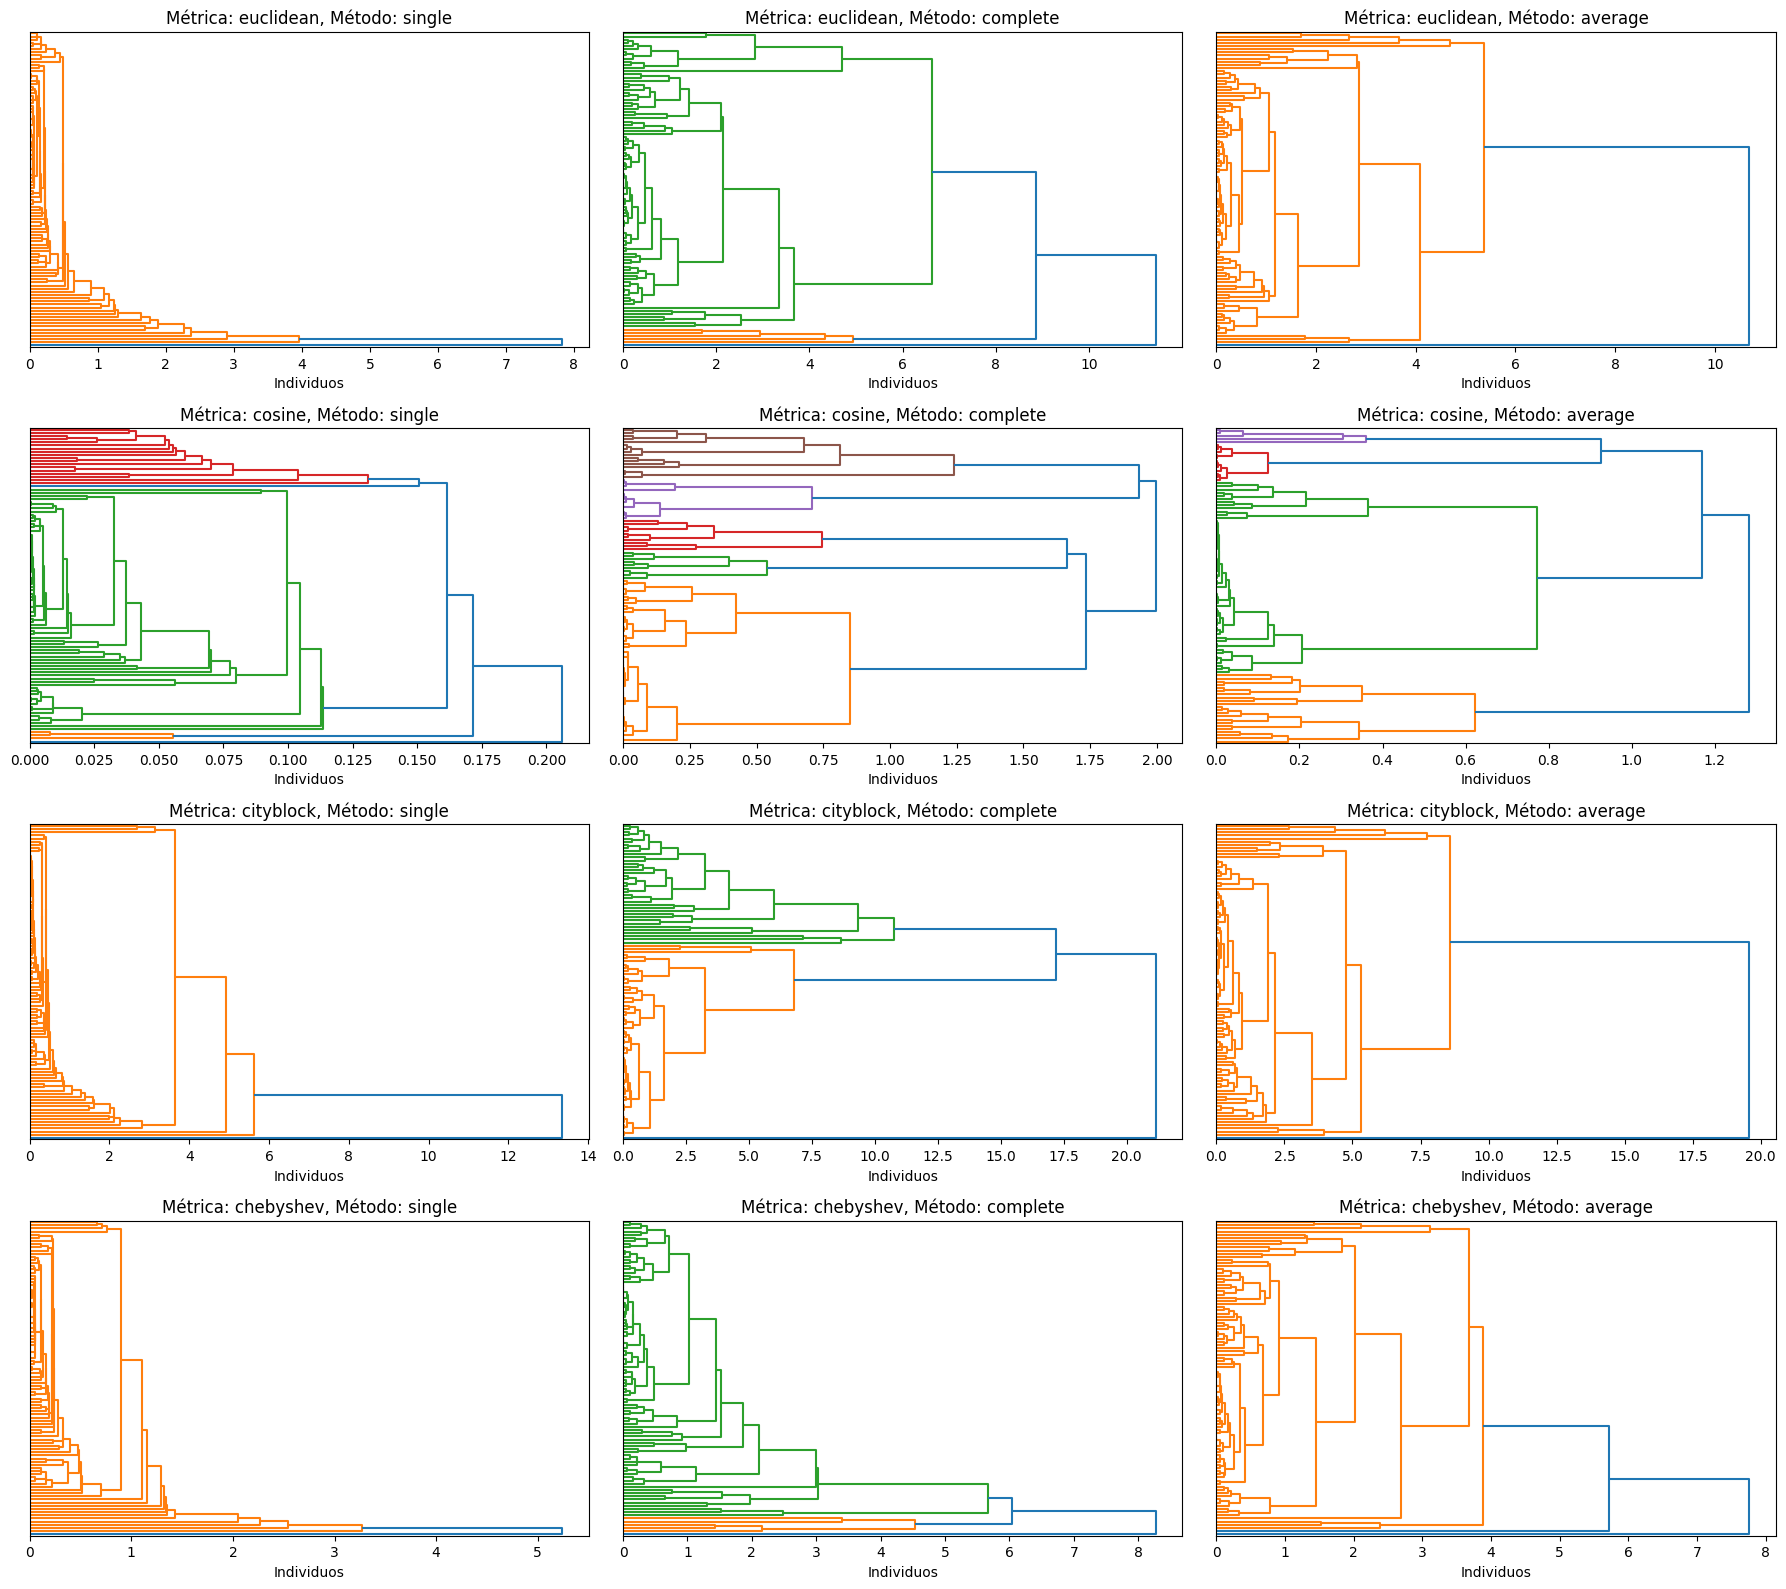

In [ ]:
# Definir las combinaciones de métricas y funciones de enlace
metricas = ['euclidean', 'cosine', 'cityblock', 'chebyshev']
metodos = ['single', 'complete', 'average']

# Configurar el tamaño de la figura y el diseño de los subgráficos
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.flatten()

# Generar y graficar dendrogramas para cada combinación de métrica y método
for i, metric in enumerate(metricas):
    for j, method in enumerate(metodos):
        ax = axes[i * len(metodos) + j]
        Z = linkage(X, method=method, metric=metric)
        dendrogram(Z, ax=ax, orientation='right', no_labels=True)
        ax.set_title(f"Métrica: {metric}, Método: {method}")
        ax.set_xlabel("Individuos")

# Ajustar el diseño
plt.tight_layout()
plt.show()


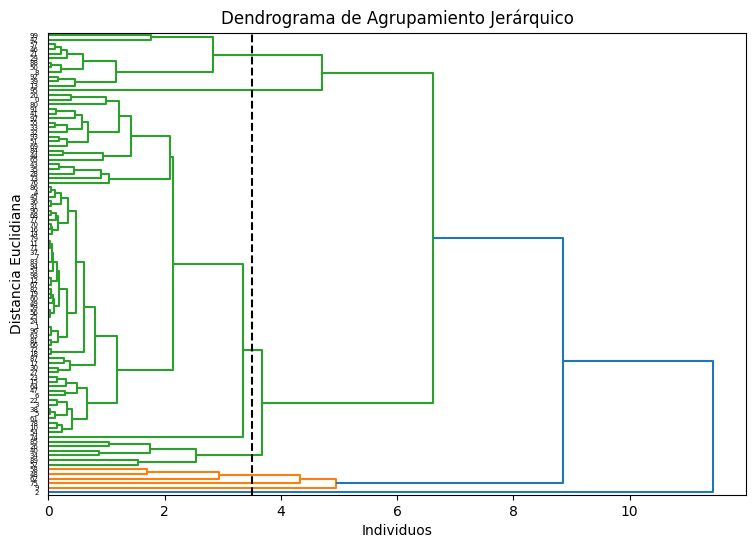

In [ ]:
# Realizamos el clustering jerárquico
Z = linkage(X, method='complete', metric='euclidean')

# Definir la distancia de corte
distancia_corte = 3.5

# Calcular el dendrograma
plt.figure(figsize=(9, 6))
dendrogram(Z,
    orientation='right', )
plt.axvline(x=distancia_corte, c='k', ls='--')
plt.title("Dendrograma de Agrupamiento Jerárquico")
plt.xlabel("Individuos")
plt.ylabel("Distancia Euclidiana")
plt.show()

---
## <font color='264CC7'> Asignación de grupos y análisis </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Revisa la media de cada grupo.</li>
  <li>Revisa el mínimo y máximo de cada grupo.</li>
  <li>Muestra algunos integrantes de cada grupo.</li>
</ul>
</div>

In [ ]:
# Ahora asignamos las etiquetas de clúster
clusters = fcluster(Z, t=distancia_corte, criterion='distance')

# Agregar la información de clúster como C1, C2, C3, etc.
data['Cluster'] = ['C' + str(c) for c in clusters]

# Revisar los primeros registros
display(data.head())

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Cluster
4259,Brothers In Arms: D-Day,0.23,0.14,0.00,0.09,C5
13685,Chaos;Head - Love Chu*Chu!,0.00,0.00,0.04,0.00,C5
162,Super Mario Advance,3.14,1.24,0.91,0.20,C8
5607,Crash of the Titans,0.27,0.02,0.00,0.03,C5
10910,World Championship Poker 2: Featuring Howard L...,0.07,0.02,0.00,0.00,C5


In [ ]:
# Cantidades de elementos por clúster
data['Cluster'].value_counts()

,count
Cluster,
C5,75
C6,12
C4,6
C1,3
C8,1
C3,1
C2,1
C7,1


In [ ]:
# Podemos ver las medias de cada clúster
data.groupby('Cluster')[numeric_cols].mean()


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Cluster,,,,
C1,0.486667,0.810000,0.053333,0.346667
C2,0.500000,0.500000,0.630000,0.330000
C3,0.690000,0.000000,0.000000,0.550000
C4,0.771667,0.373333,0.055000,0.120000
C5,0.151467,0.070667,0.008667,0.017200
C6,0.055833,0.020833,0.330833,0.005833
C7,0.000000,0.000000,1.050000,0.000000
C8,3.140000,1.240000,0.910000,0.200000


In [ ]:
# Mostremos los nombres de 5 juegos de cada clúster
for cluster in data['Cluster'].unique():
    print(f'Cluster {cluster}: cantidad de elementos {data[data["Cluster"] == cluster].shape[0]}')
    display(data[data['Cluster'] == cluster].head(5))

Cluster C5: cantidad de elementos 75


,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Cluster
4259,Brothers In Arms: D-Day,0.23,0.14,0.00,0.09,C5
13685,Chaos;Head - Love Chu*Chu!,0.00,0.00,0.04,0.00,C5
5607,Crash of the Titans,0.27,0.02,0.00,0.03,C5
10910,World Championship Poker 2: Featuring Howard L...,0.07,0.02,0.00,0.00,C5
7168,Madden NFL 12,0.21,0.00,0.00,0.02,C5


Cluster C8: cantidad de elementos 1


,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Cluster
162,Super Mario Advance,3.14,1.24,0.91,0.2,C8


Cluster C6: cantidad de elementos 12


,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Cluster
6044,Just Dance Wii 2,0.00,0.00,0.29,0.00,C6
3759,Clock Tower,0.07,0.05,0.38,0.03,C6
8085,Battle Commander: Hachibushu Shura no Heihou,0.00,0.00,0.18,0.00,C6
6288,Dragon Ball GT: Final Bout,0.02,0.02,0.22,0.02,C6
5175,Kamaitachi no Yoru 2,0.00,0.00,0.36,0.00,C6


Cluster C3: cantidad de elementos 1


,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Cluster
1607,WWE SmackDown vs. Raw 2009,0.69,0.0,0.0,0.55,C3


Cluster C4: cantidad de elementos 6


,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Cluster
1867,Untold Legends: Brotherhood of the Blade,0.54,0.33,0.01,0.22,C4
1554,Road Rash,0.71,0.48,0.00,0.08,C4
1569,Kung Fu Panda,0.56,0.57,0.00,0.14,C4
1460,Donkey Kong Jungle Beat,0.84,0.22,0.24,0.04,C4
1211,Dark Cloud,0.83,0.44,0.08,0.19,C4


Cluster C1: cantidad de elementos 3


,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Cluster
1414,Ridge Racer 7,0.24,0.70,0.16,0.26,C1
1440,FIFA Soccer 08,0.20,0.76,0.00,0.39,C1
657,LEGO Star Wars: The Complete Saga,1.02,0.97,0.00,0.39,C1


Cluster C2: cantidad de elementos 1


,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Cluster
866,Hot Shots Golf: Open Tee,0.5,0.5,0.63,0.33,C2


Cluster C7: cantidad de elementos 1


,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Cluster
1973,Tag Team Match M.U.S.C.L.E.,0.0,0.0,1.05,0.0,C7


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Cluster C1: "Éxito en Europa con Presencia Norteamericana"</strong><br>
<ul>
  <li><strong>Cantidad de elementos:</strong> 3</li>
  <li><strong>Descripción:</strong> Juegos con un fuerte rendimiento en Europa, pero con ventas significativas también en Norteamérica. Presencia limitada en Japón y otras regiones.</li>
</ul>
</div>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Cluster C2: "Éxito Equilibrado con Enfoque en Japón"</strong><br>
<ul>
  <li><strong>Cantidad de elementos:</strong> 1</li>
  <li><strong>Descripción:</strong> Juego con ventas equilibradas entre Norteamérica, Europa y Japón, siendo Japón la región con mayor relevancia.</li>
</ul>
</div>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Cluster C3: "Éxito Norteamericano con Otros Mercados Secundarios"</strong><br>
<ul>
  <li><strong>Cantidad de elementos:</strong> 1</li>
  <li><strong>Descripción:</strong> Juego con un gran enfoque en ventas norteamericanas, con un impacto significativo en otras regiones como "Other".</li>
</ul>
</div>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Cluster C4: "Éxito Global con Alta Presencia en Todas las Regiones"</strong><br>
<ul>
  <li><strong>Cantidad de elementos:</strong> 6</li>
  <li><strong>Descripción:</strong> Juegos con un buen rendimiento global, con ventas significativas en Norteamérica, Europa y Japón. Bien distribuidos entre regiones.</li>
</ul>
</div>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Cluster C5: "Ventas Moderadas y Diversas"</strong><br>
<ul>
  <li><strong>Cantidad de elementos:</strong> 75</li>
  <li><strong>Descripción:</strong> Juegos con ventas moderadas y bien distribuidas entre varias regiones, aunque no dominan en ninguna en particular.</li>
</ul>
</div>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Cluster C6: "Éxito en Japón con Ventas Limitadas en Otras Regiones"</strong><br>
<ul>
  <li><strong>Cantidad de elementos:</strong> 12</li>
  <li><strong>Descripción:</strong> Juegos que se destacan por sus ventas significativas en Japón, con un impacto reducido en otras regiones.</li>
</ul>
</div>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Cluster C7: "Éxito Exclusivo en Japón"</strong><br>
<ul>
  <li><strong>Cantidad de elementos:</strong> 1</li>
  <li><strong>Descripción:</strong> Juego con un enfoque exclusivo en Japón, con ventas destacadas en esa región y nulas en otras.</li>
</ul>
</div>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Cluster C8: "Éxito Global Dominante"</strong><br>
<ul>
  <li><strong>Cantidad de elementos:</strong> 1</li>
  <li><strong>Descripción:</strong> Juego con ventas extremadamente altas en todas las regiones, destacándose como un título global exitoso.</li>
</ul>
</div>


---
## <font color='264CC7'> Visualizaciones  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
  <li>Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?</li>
</ul>
</div>

In [ ]:
# Asegurémonos de que las dimensiones de X y df coincidan
X = data[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]  # Seleccionamos columnas de ventas
assert len(X) == len(data), "Las dimensiones de X y df no coinciden."

# Realizo un PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Crear un DataFrame para graficar fácilmente
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = data['Cluster'].values  # La columna 'Cluster' debe coincidir en tamaño
df_pca['Name'] = data['Name'].values if 'Name' in data else [f"Juego {i}" for i in range(len(data))]

# Crear el scatterplot interactivo con Plotly Express
fig = px.scatter(
    df_pca,
    x='PC1',
    y='PC2',
    color='Cluster',
    hover_data=['Name'],  # Mostrará los nombres de los juegos
)

# Personalizar apariencia
fig.update_traces(marker=dict(opacity=0.8))
fig.update_layout(
    title='Clústeres visualizados en 2D (PCA)',
    width=800,
    height=600,
)

# Mostrar el gráfico
fig.show()

# Porcentaje de varianza explicada por los dos componentes principales
print(f"Porcentaje de varianza explicada por los dos componentes principales:")
print(f"Componente 1 (PC1): {pca.explained_variance_ratio_[0] * 100:.2f}%")
print(f"Componente 2 (PC2): {pca.explained_variance_ratio_[1] * 100:.2f}%")


Porcentaje de varianza explicada por los dos componentes principales:
Componente 1 (PC1): 75.90%
Componente 2 (PC2): 13.14%


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Pregunta 1:</strong> ¿Qué tan buenos te parecen los grupos?<br>
<ul>
  <li>Los grupos parecen razonablemente buenos, con una separación adecuada en el gráfico.</li>
  <li>Algunos clusters tienen ligeras superposiciones, pero la estructura general es clara.</li>
</ul>
</div>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Pregunta 2:</strong> Indica el porcentaje de la varianza explicada en el gráfico, ¿afecta esto a tu visualización?<br>
<ul>
  <li><strong>Porcentaje de varianza explicada:</strong></li>
  <ul>
    <li>Componente 1 (PC1): 75.90%</li>
    <li>Componente 2 (PC2): 13.14%</li>
  </ul>
  <li>Estos dos componentes explican un total del 89.04% de la varianza, lo cual es alto.</li>
</ul>
</div>


---
## <font color='264CC7'> Métricas  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

# Asegurémonos de que X contiene las columnas numéricas de ventas
X = data[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]

# Convertir los clusters a valores numéricos si no lo están
label_encoder = LabelEncoder()
clusters = label_encoder.fit_transform(data["Cluster"])  # Convierte los nombres de los clusters a números

# Calcular la métrica de la silueta
silhouette_avg = silhouette_score(X, clusters)

# Mostrar el resultado
print(f"El coeficiente de silueta promedio para los clusters es: {silhouette_avg:.2f}")

# Interpretación
if silhouette_avg > 0.5:
    print("Los grupos son muy buenos y están bien separados.")
elif 0.2 < silhouette_avg <= 0.5:
    print("Los grupos son razonables pero podrían mejorarse.")
else:
    print("Los grupos no son buenos, y existe mucha superposición entre ellos.")


El coeficiente de silueta promedio para los clusters es: 0.40
Los grupos son razonables pero podrían mejorarse.


---
## <font color='264CC7'> Iteraciones </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza el proceso de agrupamiento jerárquico con diferentes parámetros, analiza la métrica de la silueta de cada uno e indica cuál es el mejor.
</div>

In [ ]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster
import pandas as pd

# Definir diferentes combinaciones de parámetros para el clustering jerárquico
linkage_methods = ['single', 'complete', 'average']
distance_metrics = ['euclidean', 'cityblock', 'cosine']

# Variable para almacenar los resultados
results = []

# Realizar agrupamiento jerárquico con diferentes combinaciones de parámetros
for method in linkage_methods:
    for metric in distance_metrics:
        try:
            # Calcular el linkage
            Z = linkage(X, method=method, metric=metric if method != 'ward' else 'euclidean')  # Ward solo funciona con Euclidean

            # Crear los clusters con un umbral de distancia
            clusters = fcluster(Z, t=4, criterion='maxclust')  # Número de clusters arbitrario (puedes ajustar)

            # Calcular la métrica de silueta
            silhouette_avg = silhouette_score(X, clusters)

            # Almacenar los resultados
            results.append({
                'method': method,
                'metric': metric,
                'silhouette': silhouette_avg
            })
        except Exception as e:
            # En caso de error, almacenar el método y métrica con el error
            results.append({
                'method': method,
                'metric': metric,
                'silhouette': None,
                'error': str(e)
            })

# Crear un DataFrame con los resultados
df_results = pd.DataFrame(results)

# Encontrar la combinación con la mejor métrica de silueta
best_result = df_results[df_results['silhouette'] == df_results['silhouette'].max()]

# Mostrar los resultados ordenados por la métrica de silueta
df_results = df_results.sort_values(by='silhouette', ascending=False)
display("Resultados de Métricas de Silueta para Agrupamiento Jerárquico", df_results)

# Imprimir la mejor configuración
display("Mejor configuración de agrupamiento jerárquico:")
display(best_result)


'Resultados de Métricas de Silueta para Agrupamiento Jerárquico'

,method,metric,silhouette
4,complete,cityblock,0.578108
6,average,euclidean,0.549720
3,complete,euclidean,0.547557
1,single,cityblock,0.535130
7,average,cityblock,0.534021
0,single,euclidean,0.501557
5,complete,cosine,0.070497
8,average,cosine,0.070497
2,single,cosine,0.067498


'Mejor configuración de agrupamiento jerárquico:'

,method,metric,silhouette
4,complete,cityblock,0.578108


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Pregunta:</strong> ¿Cuál es la mejor configuración de agrupamiento jerárquico?<br>
<ul>
  <li>La métrica de silueta más alta se obtuvo con la configuración <strong>complete + cityblock</strong>, con un valor de <strong>0.578</strong>. Esto sugiere que esta combinación genera clusters bien definidos y separados.</li>
  <li>Sin embargo, al analizar el dendrograma, gráficamente la configuración <strong>complete + euclidean</strong> parece ofrecer una mejor interpretación visual de los clusters, con separaciones más claras y coherentes.</li>
</ul>
</div>
